#Group No 12
Jitesh Parapoil,
Vaibhavi Deshpande,
Shuddhendu Mishra,
Brain Strickland


Importing the data

In [1]:
!curl -X GET \
     "https://datasets-server.huggingface.co/rows?dataset=ZhongshengWang%2FAlpaca-cnn-dailymail&config=default&split=train&offset=0&length=100"


{"features":[{"feature_idx":0,"name":"input","type":{"dtype":"string","_type":"Value"}},{"feature_idx":1,"name":"instruction","type":{"dtype":"string","_type":"Value"}},{"feature_idx":2,"name":"output","type":{"dtype":"string","_type":"Value"}}],"rows":[{"row_idx":0,"row":{"input":"It's official: U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria. Obama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons. The proposed legislation from Obama asks Congress to approve the use of military force \"to deter, disrupt, prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction.\" It's a step that is set to turn an international crisis into a fierce domestic political battle. There are key questions looming over the debate: What did U.N. we

In [2]:
!curl -H "Accept: application/json" -X GET "https://datasets-server.huggingface.co/rows?dataset=ZhongshengWang%2FAlpaca-cnn-dailymail&config=default&split=train&offset=0&length=100" -o output.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  454k  100  454k    0     0   670k      0 --:--:-- --:--:-- --:--:--  670k


Creating the dataset in pandas

In [3]:
import pandas as pd
import json

with open('output.json') as f:
    data = json.load(f)

# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data['rows'],
                     meta=['row', ['input', 'instruction', 'output']])
df.drop('truncated_cells', axis=1, inplace=True)
df.columns = ['idx', 'input', 'instructions', 'summary']
df.head()

,idx,input,instructions,summary
0,0,It's official: U.S. President Barack Obama wan...,Please complete the task of abstracting and ex...,Syrian official: Obama climbed to the top of t...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Please complete the task of abstracting and ex...,Usain Bolt wins third gold of world championsh...
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",Please complete the task of abstracting and ex...,The employee in agency's Kansas City office is...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,Please complete the task of abstracting and ex...,NEW: A Canadian doctor says she was part of a ...
4,4,(CNN) -- Police arrested another teen Thursday...,Please complete the task of abstracting and ex...,Another arrest made in gang rape outside Calif...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idx           100 non-null    int64 
 1   input         100 non-null    object
 2   instructions  100 non-null    object
 3   summary       100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


Preprocessing of the data

In [5]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
stop_words = set(stopwords.words('english'))

def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)
    return (" ".join(long_words)).strip()

In [12]:
from bs4 import BeautifulSoup
import re

In [13]:
#call the function
cleaned_text = []
for t in df['input']:
    cleaned_text.append(text_cleaner(t,0))

In [14]:
cleaned_text[:5]

['official president barack obama wants lawmakers weigh whether use military force syria obama sent letter heads house senate saturday night hours announcing believes military action syrian targets right step take alleged use chemical weapons proposed legislation obama asks congress approve use military force deter disrupt prevent degrade potential future uses chemical weapons weapons mass destruction step set turn international crisis fierce domestic political battle key questions looming debate weapons inspectors find syria happens congress votes syrian government react televised address white house rose garden earlier saturday president said would take case congress wants believe authority carry military action without specific congressional authorization know country stronger take course actions even effective said debate issues big business usual obama said top congressional leaders agreed schedule debate body returns washington september senate foreign relations committee hold he

In [15]:
#call the function
cleaned_summary = []
for t in df['summary']:
    cleaned_summary.append(text_cleaner(t,1))

In [16]:
cleaned_summary[:5]

['syrian official obama climbed to the top of the tree does not know how to get down obama sends letter to the heads of the house and senate obama to seek congressional approval on military action against syria aim is to determine whether cw were used not by whom says spokesman',
 'usain bolt wins third gold of world championship anchors jamaica to relay victory eighth gold at the championships for bolt jamaica double up in women relay',
 'the employee in agency kansas city office is among hundreds of virtual workers the employee travel to and from the mainland last year cost more than the telecommuting program like all gsa practices is under review',
 'new canadian doctor says she was part of team examining harry burkhart in new diagnosis autism severe anxiety post traumatic stress disorder and depression burkhart is also suspected in german arson probe officials say prosecutors believe the german national set string of fires in los angeles',
 'another arrest made in gang rape outside

In [17]:
df['cleaned_text']=cleaned_text
df['cleaned_summary']=cleaned_summary

Visualisation of the Data

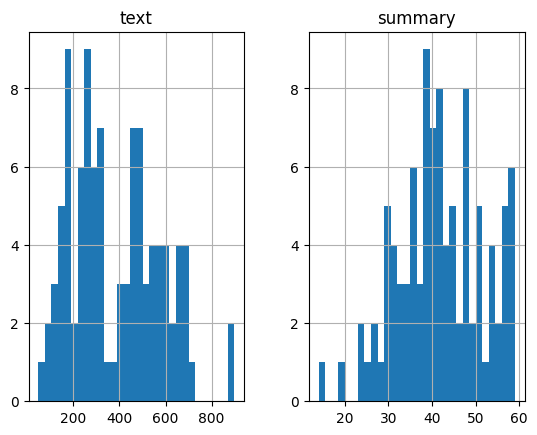

In [18]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [19]:
#proportion of length of summaries
cnt=0
for i in df['cleaned_summary']:
    if(len(i.split())<=60):
        cnt=cnt+1
print('Summary Length Proportion:', cnt/len(df['cleaned_summary']))

#prportion of length of news
cnt=0
for i in df['cleaned_text']:
    if(len(i.split())<=700):
        cnt=cnt+1
print('News Length Proportion:', cnt/len(df['cleaned_text']))

Summary Length Proportion: 1.0
News Length Proportion: 0.97


In [20]:
df.columns

Index(['idx', 'input', 'instructions', 'summary', 'cleaned_text',
       'cleaned_summary'],
      dtype='object')

In [21]:
df.head()

,idx,input,instructions,summary,cleaned_text,cleaned_summary
0,0,It's official: U.S. President Barack Obama wan...,Please complete the task of abstracting and ex...,Syrian official: Obama climbed to the top of t...,official president barack obama wants lawmaker...,syrian official obama climbed to the top of th...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Please complete the task of abstracting and ex...,Usain Bolt wins third gold of world championsh...,usain bolt rounded world championships sunday ...,usain bolt wins third gold of world championsh...
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",Please complete the task of abstracting and ex...,The employee in agency's Kansas City office is...,kansas city missouri general services administ...,the employee in agency kansas city office is a...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,Please complete the task of abstracting and ex...,NEW: A Canadian doctor says she was part of a ...,los angeles medical doctor vancouver british c...,new canadian doctor says she was part of team ...
4,4,(CNN) -- Police arrested another teen Thursday...,Please complete the task of abstracting and ex...,Another arrest made in gang rape outside Calif...,police arrested another teen thursday sixth su...,another arrest made in gang rape outside calif...


Importing the pipeline from hugging face

In [22]:
from transformers import pipeline

Importing the T-5 model and tokenizer

In [23]:
#Example testing
summarizer = pipeline(
    "summarization", model="t5-base", tokenizer="t5-base", framework="tf"
)

input = "Parents need to know that Top Gun is a blockbuster 1980s action thriller starring Tom Cruise that's chock full of narrow escapes, chases, and battles. But there are also violent and upsetting scenes, particularly the death of a main character, which make it too intense for younger kids. There's also one graphic-for-its-time sex scene (though no explicit nudity) and quite a few shirtless men in locker rooms and, in one iconic sequence, on a beach volleyball court. Winning is the most important thing to all the pilots, who try to intimidate one another with plenty of posturing and banter -- though when push comes to shove, loyalty and friendship have important roles to play, too. While sexism is noticeable and almost all characters are men, two strong women help keep some of the objectification in check."

output = summarizer(input, min_length=5, max_length=50)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [24]:
print(output)

[{'summary_text': '1980s action thriller starring Tom Cruise is chock full of chases and battles . there are also violent and upsetting scenes, particularly the death of a main character . two strong women help keep some of the objectification'}]


Creating summaries on the dataframe

In [26]:
from tqdm import tqdm

def summary_generation(news: str):
    summaries = []
    for text in tqdm(news):
        summaries.append(summarizer(text, min_length=5, max_length=50)[0]['summary_text'])
    return summaries

df['t5_summary'] = summary_generation(df['cleaned_text'])
df.head(10)


100%|██████████| 100/100 [55:30<00:00, 33.31s/it]


,idx,input,instructions,summary,cleaned_text,cleaned_summary,t5_summary
0,0,It's official: U.S. President Barack Obama wan...,Please complete the task of abstracting and ex...,Syrian official: Obama climbed to the top of t...,official president barack obama wants lawmaker...,syrian official obama climbed to the top of th...,president obama says syria needs congress' app...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Please complete the task of abstracting and ex...,Usain Bolt wins third gold of world championsh...,usain bolt rounded world championships sunday ...,usain bolt wins third gold of world championsh...,usain bolt claims third gold at world champion...
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",Please complete the task of abstracting and ex...,The employee in agency's Kansas City office is...,kansas city missouri general services administ...,the employee in agency kansas city office is a...,gsa kansas city employee defended hire cost tr...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,Please complete the task of abstracting and ex...,NEW: A Canadian doctor says she was part of a ...,los angeles medical doctor vancouver british c...,new canadian doctor says she was part of team ...,dr blaga stancheva family physician specialist...
4,4,(CNN) -- Police arrested another teen Thursday...,Please complete the task of abstracting and ex...,Another arrest made in gang rape outside Calif...,police arrested another teen thursday sixth su...,another arrest made in gang rape outside calif...,police arrested another teen thursday sixth su...
5,5,(CNN) -- Thousands on Saturday fled the area i...,Please complete the task of abstracting and ex...,"Humanitarian groups expect 4,000 refugees in o...",thousands saturday fled area southwestern ivor...,humanitarian groups expect refugees in one cam...,seven peacekeepers and eight civilians killed ...
6,6,(CNN) -- Four groups that advocate for immigra...,Please complete the task of abstracting and ex...,NEW: 4 groups announce legal challenge in Phoe...,four groups advocate immigrant rights said thu...,new groups announce legal challenge in phoenix...,phoenix mayor phil gordon disappointed thursda...
7,7,While Labor Day is the unofficial end of summe...,Please complete the task of abstracting and ex...,Labor Day is the unofficial end of summer and ...,labor day unofficial end summer also unofficia...,labor day is the unofficial end of summer and ...,republican gov scott walker locked tight elect...
8,8,Gaza City (CNN) -- An Italian humanitarian act...,Please complete the task of abstracting and ex...,NEW: Autopsy indicates he had been dead for ho...,gaza city italian humanitarian activist journa...,new autopsy indicates he had been dead for hou...,journalist vittorio arrigoni was kidnapped in ...
9,9,(CNN) -- Renowned radio personality Casey Kase...,Please complete the task of abstracting and ex...,The radio personality was taken to a hospital ...,renowned radio personality casey kasem critica...,the radio personality was taken to hospital su...,renowned radio personality casey kasem admitte...


Output dataframe

In [27]:
df.head()

,idx,input,instructions,summary,cleaned_text,cleaned_summary,t5_summary
0,0,It's official: U.S. President Barack Obama wan...,Please complete the task of abstracting and ex...,Syrian official: Obama climbed to the top of t...,official president barack obama wants lawmaker...,syrian official obama climbed to the top of th...,president obama says syria needs congress' app...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Please complete the task of abstracting and ex...,Usain Bolt wins third gold of world championsh...,usain bolt rounded world championships sunday ...,usain bolt wins third gold of world championsh...,usain bolt claims third gold at world champion...
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",Please complete the task of abstracting and ex...,The employee in agency's Kansas City office is...,kansas city missouri general services administ...,the employee in agency kansas city office is a...,gsa kansas city employee defended hire cost tr...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,Please complete the task of abstracting and ex...,NEW: A Canadian doctor says she was part of a ...,los angeles medical doctor vancouver british c...,new canadian doctor says she was part of team ...,dr blaga stancheva family physician specialist...
4,4,(CNN) -- Police arrested another teen Thursday...,Please complete the task of abstracting and ex...,Another arrest made in gang rape outside Calif...,police arrested another teen thursday sixth su...,another arrest made in gang rape outside calif...,police arrested another teen thursday sixth su...


Saving the dataframe to csv format

In [28]:
df.to_csv('t5_summary.csv')

Evaluation Metrics

In [31]:
!pip install evaluate
!pip install rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=3884908f1debc36aaa16e73ebec988a88985363dd92b9dab6c51d86706683d02
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


Comparison of generated summary with given raw summary

In [32]:
import evaluate
rouge = evaluate.load('rouge')

results1 = rouge.compute(predictions = df['summary'],
                        references = df['t5_summary'])
print(results1)

{'rouge1': 0.20362563506201625, 'rouge2': 0.05437856158971373, 'rougeL': 0.1522939811700652, 'rougeLsum': 0.1780464496694776}


In [33]:
bleu = evaluate.load("bleu")
results = bleu.compute(predictions = df['summary'],
                        references = df['t5_summary'])
print(results)

{'bleu': 0.00600837924864518, 'precisions': [0.10378654110260938, 0.013408044826896138, 0.002246273228507249, 0.0004169272461955389], 'brevity_penalty': 1.0, 'length_ratio': 1.7491420727522307, 'translation_length': 5097, 'reference_length': 2914}


Comparison of generated summary with cleaned summary

In [34]:
import evaluate
rouge = evaluate.load('rouge')

results1 = rouge.compute(predictions = df['cleaned_summary'],
                        references = df['t5_summary'])
print(results1)

{'rouge1': 0.2051702765859627, 'rouge2': 0.05614515742251583, 'rougeL': 0.1532536768122575, 'rougeLsum': 0.15388290639922814}


In [35]:
bleu = evaluate.load("bleu")
results = bleu.compute(predictions = df['cleaned_summary'],
                        references = df['t5_summary'])
print(results)

{'bleu': 0.02434164079719176, 'precisions': [0.1694224778336928, 0.04542106555364596, 0.013591744273848478, 0.003356571133488252], 'brevity_penalty': 1.0, 'length_ratio': 1.4320521619766644, 'translation_length': 4173, 'reference_length': 2914}
